In [40]:
import numpy as np
import tensorflow as tf
from tensorflow.math import confusion_matrix
import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, Input, Flatten
import tensorflow as ts
import matplotlib.pyplot as plt
from keras import datasets

# deel 1
Maak een neuraal netwerk dat in staat is van afbeeldingen aan te geven wat voor soort kledingstuk hierop staat. Maak gebruik van de fashion-mnist dataset, tensorflow en keras. Hou hierbij het volgende mantra in gedachten:


1. Definieer het probleem
2. Verzamel de data
3. Laad de data in


In [41]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

5. Prepareer de data
6. Visualiseer de data
7. Splits de data

In [42]:
X_train.shape

(60000, 28, 28)

In [43]:
X_test.shape

(10000, 28, 28)

8. Voorspel met het model de testdata
9. Evalueer het model

Zorg ervoor dat je de data splitst in een trainings- en een test-dataset (maak bijvoorbeeld gebruik van train_test_split, of een vergelijkbare techniek in keras). Maak visualisaties van de data en van de voorspellingen die het model doet (vergelijk de notebook die tijdens het plenaire deel is besproken).

In [44]:
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax'),
])


model.compile(
    optimizer=tf. keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

Het maken van het model:

In [45]:
hist = model.fit(X_train, y_train, epochs=6)

Epoch 1/6
1875/1875 [==============================] - 3s 1ms/step - loss: 2.5612 - sparse_categorical_accuracy: 0.8638
Epoch 2/6
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4121 - sparse_categorical_accuracy: 0.9050
Epoch 3/6
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2991 - sparse_categorical_accuracy: 0.9250
Epoch 4/6
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2480 - sparse_categorical_accuracy: 0.9368
Epoch 5/6
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2307 - sparse_categorical_accuracy: 0.9418
Epoch 6/6
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2131 - sparse_categorical_accuracy: 0.9457


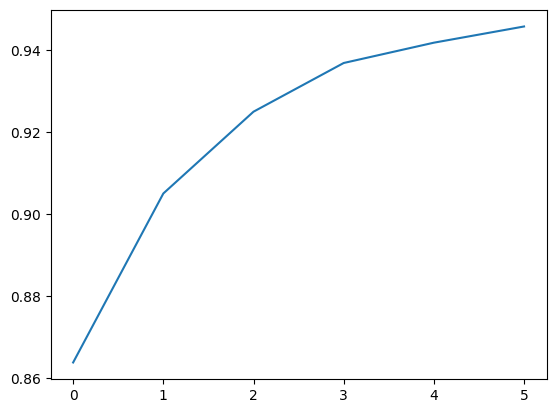

In [46]:
plt.plot(hist.history['sparse_categorical_accuracy'])

Creating condusion matrix

In [47]:
y_pred = model.predict(X_test)
confusion_matrix(np.argmax(y_pred, axis=1), y_test)

313/313 [==============================] - 0s 794us/step


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 951,    0,    5,    0,    0,    3,    5,    0,    3,    3],
       [   1, 1120,    5,    0,    0,    1,    4,    4,    0,    7],
       [   2,    3,  963,   22,    4,    0,    1,   14,    9,    0],
       [   1,    1,   10,  917,    0,   29,    1,    3,    9,    7],
       [   3,    0,    1,    0,  921,    1,    4,    2,    3,   11],
       [   0,    0,    1,   19,    0,  805,    2,    0,    3,    3],
       [   5,    4,    3,    0,    7,   13,  926,    0,    9,    0],
       [   1,    0,    8,    4,    3,    1,    0,  970,    1,   10],
       [  16,    7,   34,   40,   12,   37,   15,   11,  928,   22],
       [   0,    0,    2,    8,   35,    2,    0,   24,    9,  946]],
      dtype=int32)>

Visualization

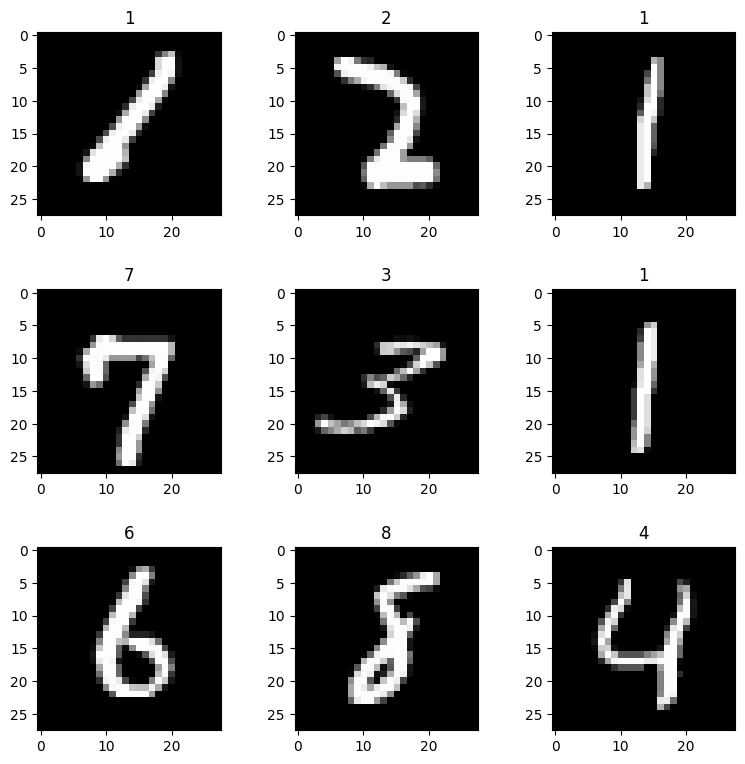

In [48]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(8,8))
for c in range(3):
    for r in range(3):
        idx = np.random.choice(10_000)
        img = np.array(X_test[idx], dtype='float')
        ax[c, r].imshow(img.reshape(28,28), cmap='gray')

        label_y = y_test[idx]
        label_p = np.argmax(y_pred[idx])
        if label_y == label_p:
            ax[c, r].set_title(label_y)
        else:
            ax[c, r].set_title(f'{label_y} ({label_p})', c='r')
fig.tight_layout(pad=2)
plt.show()

# deel 2

Schrijfster Janelle Shane heeft een aardige blog over AI en machine modellen, waarin ze de grenzen van dit soort technieken opzoekt. Zo heeft ze een keer een netwerk getraind om te afbeeldingen van Star Wars karakters te kunnen klassificeren, om vervolgens foto's van zichzelf of andere personen hierdoor te laten klassificeren. Probeer hetzelfde eens bij het netwerk dat je hebt getraind om die kleding te klassificeren. Als je hier een foto van jezelf aan geeft, kan het model dan aangeven hoeveel procent schoen je bent, of hoeveel procent T-shirt?

